In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

In [3]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [15]:
from dialogue2graph.pipelines.cycled_graphs.pipeline import Pipeline
from dialogue2graph.pipelines.core.graph import Graph

In [5]:
pipeline = Pipeline()

In [6]:
with open('transfer.json') as f:
    data = json.load(f)

In [9]:
data['dialogues']

[{'messages': [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'My flight is on Saturday at 10 AM from JFK.',
    'participant': 'user'},
   {'text': 'Got it. Where should the driver pick you up?',
    'participant': 'assistant'},
   {'text': 'Pickup is from my home in Brooklyn.', 'participant': 'user'},
   {'text': 'Thanks! How many passengers will be traveling?',
    'participant': 'assistant'},
   {'text': "It's just me traveling.", 'participant': 'user'},
   {'text': 'Alright! Do you have any preference for the type of vehicle? We have sedans, SUVs, and vans available.',
    'participant': 'assistant'},
   {'text': 'Actually, can I change my vehicle type?', 'participant': 'user'},
   {'text': 'Of course! What type of vehicle would y

In [11]:
graph = pipeline.invoke(data['dialogues'])

LISTS_N:  [(0, ['I need to book a ride to the airport.', 'Can you help me arrange an airport transfer?']), (1, ['My flight is on Saturday at 10 AM from JFK.', 'Departure is from LAX tomorrow at 6 PM.', 'Do you have any other options?', 'Can I just take a taxi instead?', "Never mind, I'll figure it out myself.", 'Actually, I changed my mind. Thanks anyway.']), (2, ['Pickup is from my home in Brooklyn.', "I'd like to be picked up from my hotel.", 'Actually, I need to change my pickup location.', 'Hold on, pickup should be from my office instead.']), (3, ["It's just me traveling.", 'There will be three of us.']), (4, ['Actually, can I change my vehicle type?', 'A sedan would be fine.', 'I think an SUV would be more comfortable.', 'Wait, I think I need a bigger car.']), (5, ['On second thought, my original choice is fine.', 'You know what? Never mind changing it.', 'A van would be better.', "I'll go with an SUV instead."]), (6, ["No, that's it! Thanks a lot.", "Thanks, I'm all set."]), (7,

RESULT:  {'edges': [{'source': 3, 'target': 2, 'utterances': ["no, that's it! thanks a lot.", "thanks, i'm all set."]}, {'source': 8, 'target': 3, 'utterances': ['a sedan would be fine.', 'i think an suv would be more comfortable.']}, {'source': 9, 'target': 8, 'utterances': ['on second thought, my original choice is fine.', 'you know what? never mind changing it.']}, {'source': 8, 'target': 9, 'utterances': ['actually, can i change my vehicle type?', 'wait, i think i need a bigger car.']}, {'source': 7, 'target': 8, 'utterances': ["it's just me traveling.", 'there will be three of us.']}, {'source': 6, 'target': 7, 'utterances': ['pickup is from my home in brooklyn.', "i'd like to be picked up from my hotel."]}, {'source': 5, 'target': 6, 'utterances': ['my flight is on saturday at 10 am from jfk.', 'departure is from lax tomorrow at 6 pm.']}, {'source': 4, 'target': 5, 'utterances': ['i need to book a ride to the airport.', 'can you help me arrange an airport transfer?']}, {'source':

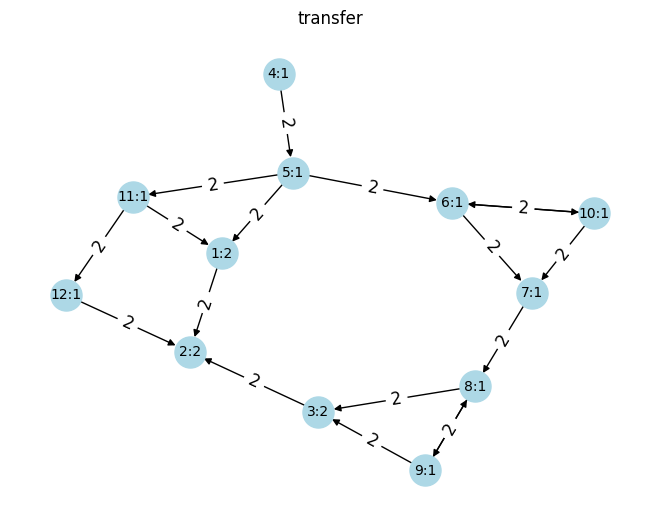

In [12]:
graph.visualise_short("transfer")

In [16]:
graph_2 = pipeline.invoke(Graph(data['graph']))

Graph has all the dialogues
LISTS_N:  [(0, ['I need to book a ride to the airport.', 'Can you help me arrange an airport transfer?']), (1, ['My flight is on Saturday at 10 AM from JFK.', 'Departure is from LAX tomorrow at 6 PM.', 'Do you have any other options?', 'Can I just take a taxi instead?', "Never mind, I'll figure it out myself.", 'Actually, I changed my mind. Thanks anyway.']), (2, ['Pickup is from my home in Brooklyn.', "I'd like to be picked up from my hotel.", 'Actually, I need to change my pickup location.', 'Hold on, pickup should be from my office instead.']), (3, ["It's just me traveling.", 'There will be three of us.']), (4, ['Actually, can I change my vehicle type?', 'A sedan would be fine.', 'I think an SUV would be more comfortable.', 'Wait, I think I need a bigger car.']), (5, ['On second thought, my original choice is fine.', 'You know what? Never mind changing it.', 'A van would be better.', "I'll go with an SUV instead."]), (6, ["No, that's it! Thanks a lot.", "

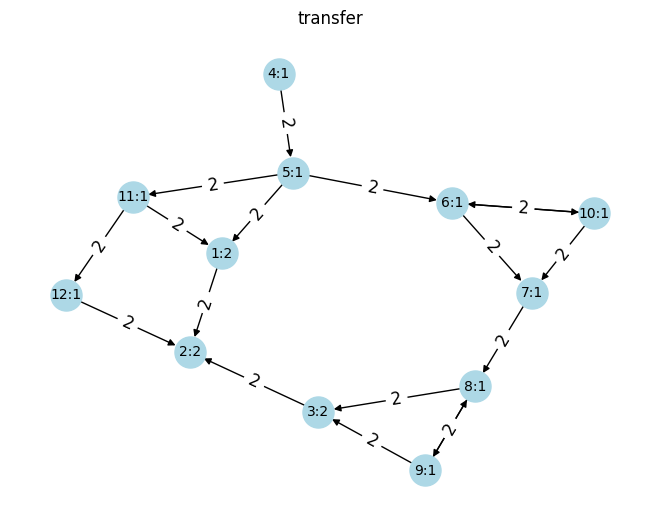

In [17]:
graph_2.visualise_short("transfer")